In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [30]:
# move to root directory
while os.path.basename(os.getcwd()) != "reward-network-iii":
    os.chdir("..")

In [31]:
files = [
    'data/24_02_04/model/mode_nodes_more_steps_0.csv',
    'data/24_02_04/model/mode_nodes_more_steps_1.csv',
    'data/24_02_04/model/mode_nodes_more_steps_2.csv',
]

dfs = []
for s, file in enumerate(files):
    df = pd.read_csv(file)
    df['seed'] = s
    dfs.append(df)
df = pd.concat(dfs)

In [32]:
df[['average reward', 'average level']] = df[['test_avg_reward_all_envs', 'test_avg_level_all_envs']]

In [33]:
df = df[['episode', 'seed', 'average reward', 'average level']]

df['time'] = df['episode'] * 310 / 5000

df = df.dropna()
df['seed'] = df['seed'].astype(str)

In [34]:
df_myopic = pd.read_json('data/23_11_30/solution_test__myopic.json')
df_random = pd.read_json('data/23_11_30/solution_test__random.json')
df_take_loss = pd.read_json('data/23_11_30/solution_test__take_loss.json')


ref_max_level = {
    'myopic': df_myopic['max_level'].mean(),
    'random': df_random['max_level'].mean(),
    'take_loss': df_take_loss['max_level'].mean(),
}
ref_total_reward = {
    'myopic': df_myopic['total_reward'].mean(),
    'random': df_random['total_reward'].mean(),
    'take_loss': df_take_loss['total_reward'].mean(),
}

In [35]:
# smooth the data group by seed
df = df.groupby('seed').rolling(10, center=True).mean().reset_index()
df = df.dropna()

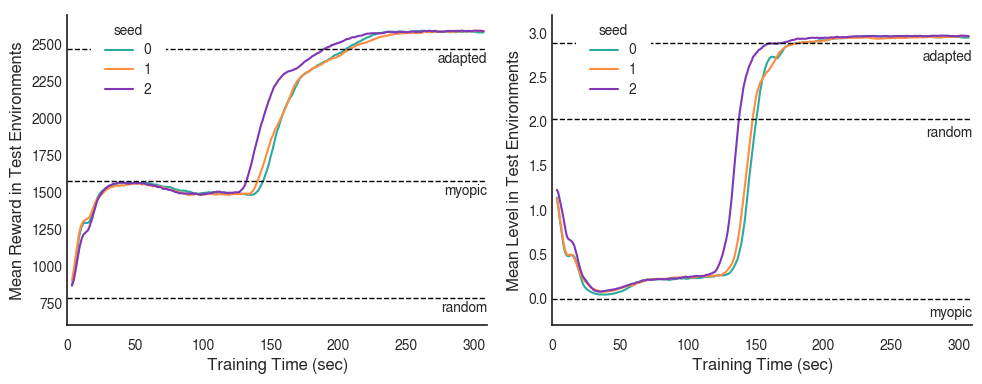

In [36]:
fig = plt.figure(figsize=(10, 4))


axes = fig.subplots(1, 2)

sns.set_theme(style='white', rc={'font.family': 'serif', 'font.serif': ['Times New Roman', 'FreeSans']})


# custom_palette = ['#1b9e77', '#d95f02', '#7570b3']
custom_palette = ['#2BAA9D', '#FF8C41', '#7F37B6', ]


ax = axes[0]

sns.lineplot(data=df, x="time", y="average reward", hue="seed", palette=custom_palette, ax=ax)

legend = ax.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', bbox_to_anchor=(0.04, 1.04), facecolor='white', borderpad=1, labelspacing=0.4)
legend.get_frame().set_alpha(1)
legend.get_frame().set_edgecolor('none')

ax.axhline(ref_total_reward['myopic'], ls='--', label='myopic', color='black', lw=1)
ax.text(310, ref_total_reward['myopic'] - 20, 'myopic', ha='right', va='top', fontsize=10)
ax.axhline(ref_total_reward['random'], ls='--', label='random', color='black', lw=1)
ax.text(310, ref_total_reward['random'] - 20, 'random', ha='right', va='top', fontsize=10)
ax.axhline(ref_total_reward['take_loss'], ls='--', label='take loss', color='black', lw=1)
ax.text(310, ref_total_reward['take_loss'] - 20, 'adapted', ha='right', va='top', fontsize=10)

ax.set_ylim(600, 2700)
ax.set_xlim(0, 310)


# ax.set_xticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Training Time (sec)', fontsize=12)
ax.set_ylabel('Mean Reward in Test Environments', fontsize=12)

# Adjust the position of the y-axis tick labels
pad_distance = - 0.02  # Adjust this value as needed for spacing
for label in ax.get_yticklabels():
    label.set_horizontalalignment('right')
    label.set_x(label.get_position()[0] - pad_distance)

ax = axes[1]

sns.lineplot(data=df, x="time", y="average level", hue="seed", ax=ax, palette=custom_palette)

legend = ax.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', bbox_to_anchor=(0.04, 1.04), facecolor='white', borderpad=1, labelspacing=0.4)
legend.get_frame().set_alpha(1)
legend.get_frame().set_edgecolor('none')

ax.axhline(ref_max_level['myopic'], ls='--', label='myopic', color='black', lw=1)
ax.text(310, ref_max_level['myopic'] - 0.08, 'myopic', ha='right', va='top', fontsize=10)
ax.axhline(ref_max_level['random'], ls='--', label='random', color='black', lw=1)
ax.text(310, ref_max_level['random'] - 0.08, 'random', ha='right', va='top', fontsize=10)
ax.axhline(ref_max_level['take_loss'], ls='--', label='take loss', color='black', lw=1)
ax.text(310, ref_max_level['take_loss'] - 0.08, 'adapted', ha='right', va='top', fontsize=10)


ax.set_ylim(-.3, 3.2)
ax.set_xlim(0, 310)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Training Time (sec)', fontsize=12)
ax.set_ylabel('Mean Level in Test Environments', fontsize=12)

# Adjust the position of the y-axis tick labels
pad_distance = - 0.02  # Adjust this value as needed for spacing
for label in ax.get_yticklabels():
    label.set_horizontalalignment('right')
    label.set_x(label.get_position()[0] - pad_distance)


folder = os.path.join('analysis','plots', 'algorithm')

os.makedirs(folder, exist_ok=True)

png_filename = os.path.join(folder,'algorithm.png')
pdf_filename = os.path.join(folder,'algorithm.pdf')

plt.tight_layout()
# fig.subplots_adjust(top=0.98, right=0.99)
plt.savefig(png_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig(pdf_filename, bbox_inches='tight', pad_inches=0.1)

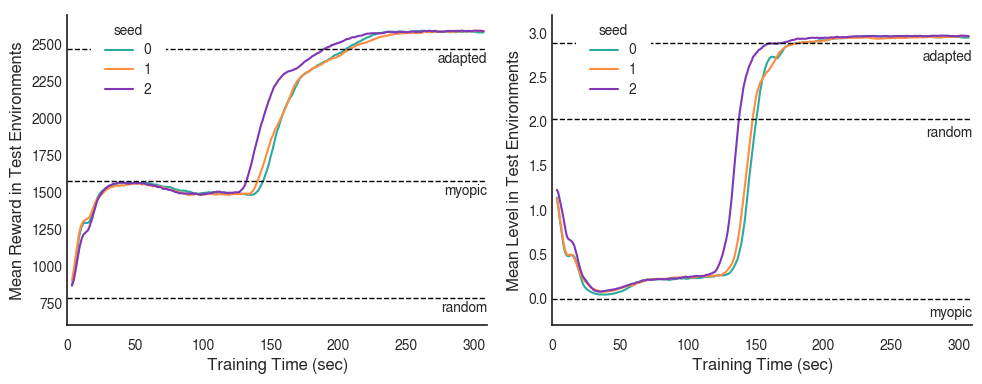

In [37]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.set_theme(style='white', rc={'font.family': 'serif', 'font.serif': ['Times New Roman', 'FreeSans']})
custom_palette = ['#2BAA9D', '#FF8C41', '#7F37B6']

lines_info = [
    ('myopic', 'myopic'),
    ('random', 'random'),
    ('take_loss', 'adapted')
]

graphs_info = [
    ("average reward", 'Mean Reward in Test Environments', ref_total_reward, [600, 2700], axes[0], 20),
    ("average level", 'Mean Level in Test Environments', ref_max_level, [-.3, 3.2], axes[1], 0.08)
]

for y_col, y_label, ref_values, y_limits, ax, y_offset in graphs_info:
    sns.lineplot(data=df, x="time", y=y_col, hue="seed", palette=custom_palette, ax=ax)
    legend = ax.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', 
                       bbox_to_anchor=(0.04, 1.04), facecolor='white', borderpad=1, labelspacing=0.4)
    legend.get_frame().set_alpha(1)
    legend.get_frame().set_edgecolor('none')
    
    for line_name, label_name in lines_info:
        ax.axhline(ref_values[line_name], ls='--', color='black', lw=1)
        ax.text(310, ref_values[line_name] - y_offset, label_name, ha='right', va='top', fontsize=10)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel('Training Time (sec)', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_ylim(*y_limits)
    ax.set_xlim(0, 310)
    
    pad_distance = -0.02
    for label in ax.get_yticklabels():
        label.set_horizontalalignment('right')
        label.set_x(label.get_position()[0] - pad_distance)

# Create folder and save figures
folder = os.path.join('analysis', 'plots', 'algorithm')
os.makedirs(folder, exist_ok=True)
png_filename = os.path.join(folder, 'algorithm.png')
pdf_filename = os.path.join(folder, 'algorithm.pdf')

plt.tight_layout()
plt.savefig(png_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig(pdf_filename, bbox_inches='tight', pad_inches=0.1)


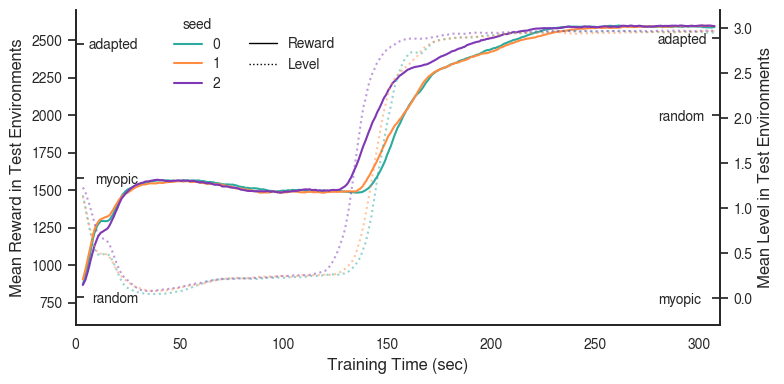

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

fig, ax1 = plt.subplots(figsize=(8, 4))

sns.set_theme(style='white', rc={'font.family': 'serif', 'font.serif': ['Times New Roman', 'FreeSans']})
custom_palette = ['#2BAA9D', '#FF8C41', '#7F37B6']

lines_info = [
    ('myopic', 'myopic'),
    ('random', 'random'),
    ('take_loss', 'adapted')
]

# Plot for rewards
ax1.set_xlabel('Training Time (sec)', fontsize=12)
ax1.set_ylabel('Mean Reward in Test Environments', fontsize=12)
ax1.set_ylim(600, 2700)
ax1.set_xlim(0, 310)
sns.lineplot(data=df, x="time", y="average reward", hue="seed", palette=custom_palette, ax=ax1, linestyle='-')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=10)
pad_distance = 0
for label in ax1.get_yticklabels():
    label.set_horizontalalignment('right')
    label.set_x(label.get_position()[0] - pad_distance)

# Second y-axis for levels
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Level in Test Environments', fontsize=12)
ax2.set_ylim(-.3, 3.2)
sns.lineplot(data=df, x="time", y="average level", hue="seed", palette=custom_palette, ax=ax2, linestyle=':', legend=None, alpha=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=10)
for label in ax2.get_yticklabels():
    label.set_horizontalalignment('left')
    label.set_x(label.get_position()[0] + pad_distance)

# Adding specific labels as secondary y-axis ticks for rewards
secax1 = ax1.secondary_yaxis('left')
secax1.set_yticks([ref_total_reward[line[0]] for line in lines_info])
secax1.set_yticklabels([line[1] for line in lines_info])
secax1.tick_params(axis='y', direction='in', pad=-45, labelsize=10)

# Adding specific labels as secondary y-axis ticks for levels
secax2 = ax2.secondary_yaxis('right')
secax2.set_yticks([ref_max_level[line[0]] for line in lines_info])
secax2.set_yticklabels([line[1] for line in lines_info])
secax2.tick_params(axis='y', direction='in', pad=-45, labelsize=10)

legend1 = ax1.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', 
                     bbox_to_anchor=(0.12, 1.04), facecolor='white', borderpad=1, labelspacing=0.4)
legend1.get_frame().set_alpha(1)
legend1.get_frame().set_edgecolor('none')

# Create custom legend for line styles
custom_lines = [Line2D([0], [0], color='black', lw=1, linestyle='-'),
                Line2D([0], [0], color='black', lw=1, linestyle=':')]

line_style_legend = ax1.legend(custom_lines, ['Reward', 'Level'], loc='upper left', bbox_to_anchor=(0.25, 0.955), frameon=False, fontsize=10, title_fontsize=10)

# Add the first legend back to the plot
ax1.add_artist(legend1)

# Create folder and save figures
folder = os.path.join('analysis', 'plots', 'algorithm')
os.makedirs(folder, exist_ok=True)
png_filename = os.path.join(folder, 'algorithm.png')
pdf_filename = os.path.join(folder, 'algorithm.pdf')

plt.tight_layout()
plt.savefig(png_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig(pdf_filename, bbox_inches='tight', pad_inches=0.1)


/tmp/ipykernel_691777/1661178065.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


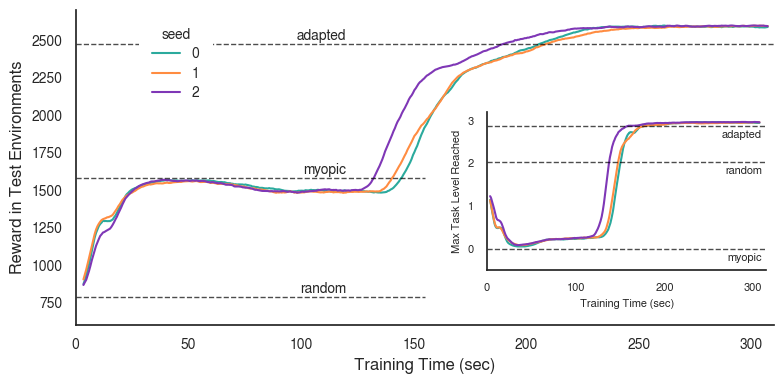

In [107]:
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


fig, ax1 = plt.subplots(figsize=(8, 4))

sns.set_theme(style='white', rc={'font.family': 'serif', 'font.serif': ['Times New Roman', 'FreeSans']})
custom_palette = ['#2BAA9D', '#FF8C41', '#7F37B6']

lines_info = [
    ('myopic', 'myopic'),
    ('random', 'random'),
    ('take_loss', 'adapted')
]

x_stop = {
    'myopic': 155,
    'random': 155,
    'take_loss': 310
}

# Plot for rewards
ax1.set_xlabel('Training Time (sec)', fontsize=12)
ax1.set_ylabel('Reward in Test Environments', fontsize=12)
ax1.set_ylim(600, 2700)
ax1.set_xlim(0, 310)
sns.lineplot(data=df, x="time", y="average reward", hue="seed", palette=custom_palette, ax=ax1, linestyle='-')


y_offset = 100
for line_name, label_name in lines_info:
    ax1.plot([0, x_stop[line_name]], [ref_total_reward[line_name], ref_total_reward[line_name]], ls='--', color='black', lw=1, alpha=0.7)
    ax1.text(120, ref_total_reward[line_name] + y_offset, label_name, ha='right', va='top', fontsize=10)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=10)

# Legends
legend1 = ax1.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', 
                     bbox_to_anchor=(0.08, 1.01), facecolor='white', borderpad=1, labelspacing=0.4)
legend1.get_frame().set_alpha(1)
legend1.get_frame().set_edgecolor('none')

# Add the first legend back to the plot
ax1.add_artist(legend1)

# Inset axis for levels
ax_inset = inset_axes(ax1, width="100%", height="100%", loc='upper right', bbox_to_anchor=(0.60, 0.2, 0.4, 0.5), bbox_transform=ax1.transAxes)
ax_inset.set_facecolor('white') 
ax_inset.set_ylim(-.5, 3.2)
ax_inset.set_xlim(0, 315)
sns.lineplot(data=df, x="time", y="average level", hue="seed", palette=custom_palette, ax=ax_inset, linestyle='-', legend=None, alpha=1)

y_offset = -0.1
for line_name, label_name in lines_info:
    ax_inset.plot([0, 315], [ref_max_level[line_name], ref_max_level[line_name]], ls='--', color='black', lw=1, alpha=0.7)
    ax_inset.text(310, ref_max_level[line_name] + y_offset, label_name, ha='right', va='top', fontsize=8)

# Setting the background color for the y-label in the inset
label = ax_inset.set_ylabel('Max Task Level Reached', fontsize=8)
label.set_bbox(dict(facecolor='white', edgecolor='none', pad=3))
label = ax_inset.set_xlabel('Training Time (sec)', fontsize=8)

ax_inset.spines['top'].set_visible(False)
ax_inset.spines['right'].set_visible(False)
ax_inset.tick_params(axis='both', which='major', labelsize=8)
ax_inset.set_xticks(np.arange(0, 310, 100))
ax_inset.set_yticks(np.arange(0, 3.1, 1))


# Create folder and save figures
folder = os.path.join('analysis', 'plots', 'algorithm')
os.makedirs(folder, exist_ok=True)
png_filename = os.path.join(folder, 'algorithm.png')
pdf_filename = os.path.join(folder, 'algorithm.pdf')

plt.tight_layout()
plt.savefig(png_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig(pdf_filename, bbox_inches='tight', pad_inches=0.1)


Figure 4: Training metrics of the three algorithms over 315 seconds of training, averaged across separate sets of test environments. The main plot shows the reward obtained by the agents, while the inset depicts the maximum task level reached by the agents. The network task has four levels, and agents must incur a loss to progress to the next level. For reference, average values for three heuristic benchmarks are indicated with dashed lines: a random agent, a myopic agent that always selects the move with the highest immediate reward, and an adaptive agent that seeks losses when available.